[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed

Detalhes da Carteira de Investimentos:

          Valor Investido (R$)  Preço Inicial (R$)  Preço Final (R$)  Rentabilidade (%)
BBAS3.SA                1500.0               24.40             28.15              15.37
ITUB4.SA                2000.0               31.78             34.17               7.52
PETR4.SA                2500.0               36.30             36.79               1.36
VALE3.SA                3000.0               58.40             55.13              -5.60

Rentabilidade total da carteira: 2.74%

Rentabilidade do IBOV: 0.79%
A carteira GANHOU do IBOV.


<Figure size 1200x600 with 0 Axes>

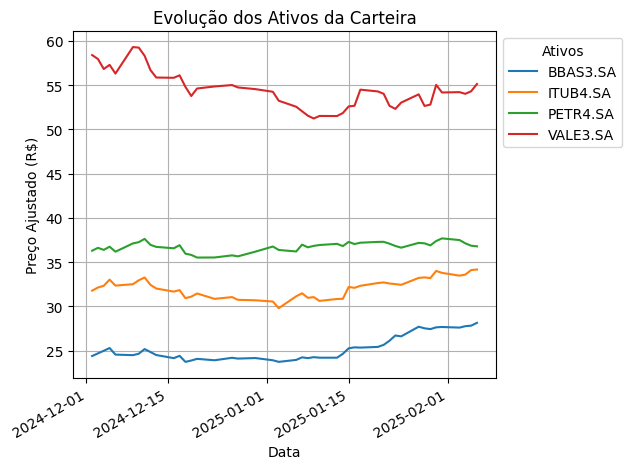

In [1]:
import os
import pandas as pd
import yfinance as yf
import pandas_datareader.data as pdr
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
pdr.get_data_yahoo = yf.download  


caminho_arquivo = "..\\carteira.txt"

if not os.path.exists(caminho_arquivo):
    print(f"Erro: O arquivo {caminho_arquivo} não foi encontrado.")
    exit(1)

carteira = {}
with open(caminho_arquivo, "r") as arquivo:
    for linha in arquivo.readlines():
        try:
            ticker, valor = linha.strip().split(" - ")
            ticker = f"{ticker}.SA"
            carteira[ticker] = float(valor)
        except ValueError:
            print(f"Erro ao processar linha: {linha.strip()} - Verifique o formato do arquivo.")
            exit(1)

data_inicial = "2024-12-01"
data_final = "2025-02-07"

tickers = list(carteira.keys())
try:
    cotacoes = pdr.get_data_yahoo(tickers, start=data_inicial, end=data_final)["Adj Close"]
except Exception as e:
    print(f"Erro ao buscar cotações: {e}")
    exit(1)

if cotacoes.empty:
    print("Erro: Nenhuma cotação foi baixada. Verifique a conexão com o Yahoo Finance.")
    exit(1)

cotacoes = cotacoes.dropna(axis=1, how='all')

precos_iniciais = cotacoes.iloc[0]
precos_finais = cotacoes.iloc[-1]
variacao_percentual = ((precos_finais - precos_iniciais) / precos_iniciais) * 100  

rentabilidade_individual = (variacao_percentual / 100) * pd.Series(carteira)
rentabilidade_total = rentabilidade_individual.sum() / sum(carteira.values()) * 100

try:
    cotacao_ibov = pdr.get_data_yahoo("^BVSP", start=data_inicial, end=data_final)["Adj Close"]
    variacao_ibov = ((cotacao_ibov.iloc[-1] - cotacao_ibov.iloc[0]) / cotacao_ibov.iloc[0]) * 100
except Exception as e:
    print(f"Erro ao buscar cotação do IBOV: {e}")
    variacao_ibov = None

df_resultados = pd.DataFrame({
    "Valor Investido (R$)": carteira,
    "Preço Inicial (R$)": precos_iniciais,
    "Preço Final (R$)": precos_finais,
    "Rentabilidade (%)": variacao_percentual
}).round(2)

print("\nDetalhes da Carteira de Investimentos:\n")
print(df_resultados.to_string())

print(f"\nRentabilidade total da carteira: {rentabilidade_total:.2f}%")

if variacao_ibov is not None:
    print(f"\nRentabilidade do IBOV: {variacao_ibov:.2f}%")
    print(f"A carteira {'GANHOU' if rentabilidade_total > variacao_ibov else 'PERDEU'} do IBOV.")
else:
    print("\nNão foi possível obter a rentabilidade do IBOV.")

plt.figure(figsize=(12, 6))
cotacoes.plot(title="Evolução dos Ativos da Carteira")
plt.xlabel("Data")
plt.ylabel("Preço Ajustado (R$)")
plt.legend(title="Ativos", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()
plt.show()
